# **XGBM AND LGBM**

# **Exploratory Data Analysis (EDA):**

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# Load datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')


In [37]:
# Display the first few rows of the Train dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# Display the first few rows of the Test dataset
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Visualize Data Distributions:**

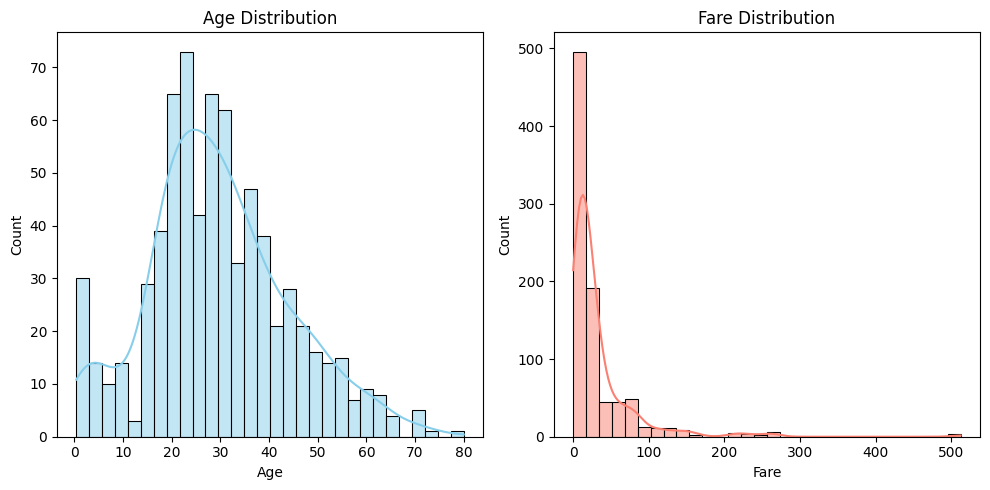

In [39]:
# Visualize the distribution of 'Age' and 'Fare' columns
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train_data['Fare'].dropna(), kde=True, bins=30, color='salmon')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()



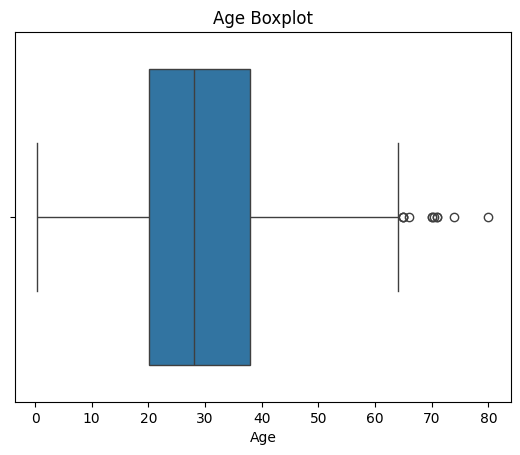

In [40]:
# Boxplot to check outliers
sns.boxplot(x=train_data['Age'])
plt.title('Age Boxplot')
plt.show()


**Relationships between Features and Survival:**

**Visualize relationships between features and survival using scatter plots and bar plots.**

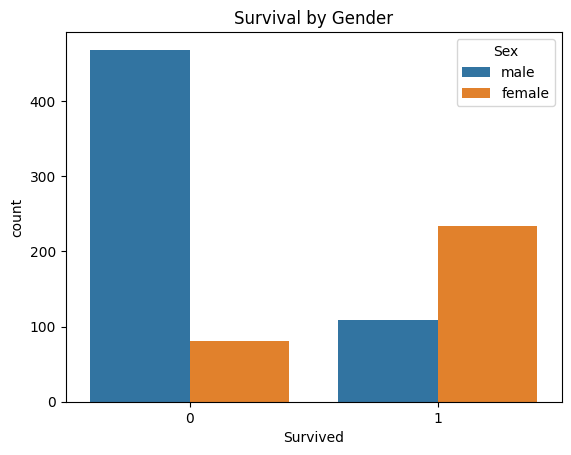

In [41]:
# Bar plot to visualize the relationship between 'Sex' and 'Survived'
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival by Gender')
plt.show()


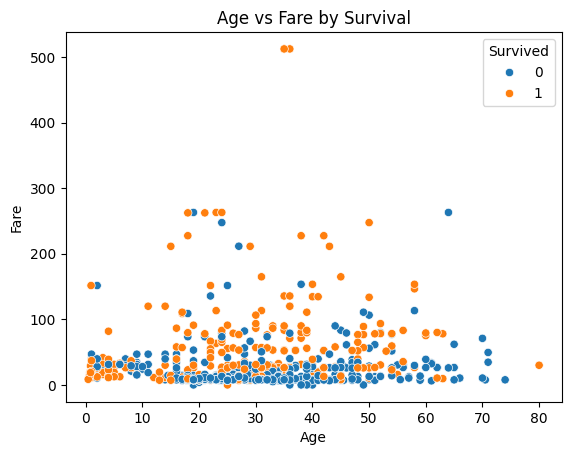

In [42]:
# Scatter plot to visualize the relationship between 'Age' and 'Fare' based on survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Age vs Fare by Survival')
plt.show()


# **Data Preprocessing**

In [43]:
# Check for missing values in the training dataset
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [44]:
# Impute missing 'Age' values with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)



<ipython-input-44-d022a6814ee5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [45]:
# Impute missing 'Embarked' values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

<ipython-input-45-6bf38948ec6f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [46]:
# Check for missing values after imputation
train_data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [47]:
# Drop columns that won't be used in the model
train_data = train_data.drop(columns=['Name', 'Ticket', 'Cabin'])


In [48]:
# You can create new features or drop irrelevant ones here. For example:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1


In [49]:
# Display the first few rows of the Train dataset
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [50]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

# One-hot encode 'Pclass' (though label encoding is also an option here)
train_data = pd.get_dummies(train_data, columns=['Pclass'], drop_first=True)


In [51]:
# Display the first few rows of the Train dataset
train_data.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Pclass_2,Pclass_3
0,1,0,1,22.0,1,0,7.2500,2,2,False,True
1,2,1,0,38.0,1,0,71.2833,0,2,False,False
2,3,1,0,26.0,0,0,7.9250,2,1,False,True
3,4,1,0,35.0,1,0,53.1000,2,2,False,False
4,5,0,1,35.0,0,0,8.0500,2,1,False,True


# **Building Predictive Models:**

**Split the Data:**

In [52]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Evaluation Metrics:**

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


**Build and Train LightGBM Model:**

In [54]:
import lightgbm as lgb

# Create and train the LightGBM model
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Evaluate the LightGBM model
print("LightGBM Model Evaluation:")
evaluate_model(lgbm_model, X_test, y_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

**Build and Train XGBoost Model:**

In [55]:
import xgboost as xgb

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
print("XGBoost Model Evaluation:")
evaluate_model(xgb_model, X_test, y_test)


XGBoost Model Evaluation:
Accuracy: 0.7933
Precision: 0.7534
Recall: 0.7432
F1 Score: 0.7483


**Hyperparameter Tuning**

In [56]:
!pip install --upgrade scikit-learn

In [57]:
!pip install --upgrade xgboost

In [58]:
pip install --upgrade lightgbm


In [59]:
pip install scikit-learn==1.6


In [60]:
# Train LightGBM model without GridSearchCV
lgbm_model = lgb.LGBMClassifier(learning_rate=0.05, n_estimators=40, num_leaves=31)
lgbm_model.fit(X_train, y_train)

# Evaluate the LightGBM model
evaluate_model(lgbm_model, X_test, y_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [61]:
# Train XGBoost model without GridSearchCV
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=3)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
evaluate_model(xgb_model, X_test, y_test)


Accuracy: 0.8101
Precision: 0.8125
Recall: 0.7027
F1 Score: 0.7536


# **Comparative Analysis**

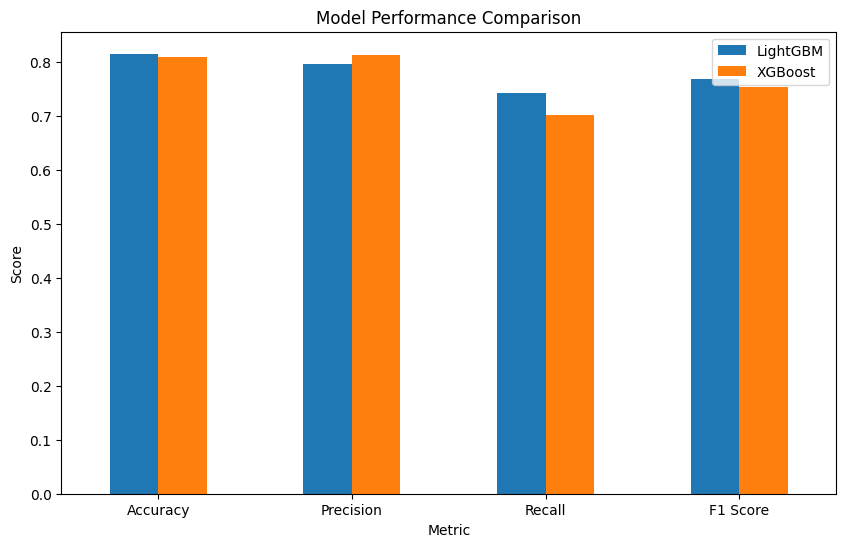

In [62]:
# Results for LightGBM
lgbm_accuracy = accuracy_score(y_test, lgbm_model.predict(X_test))
lgbm_precision = precision_score(y_test, lgbm_model.predict(X_test))
lgbm_recall = recall_score(y_test, lgbm_model.predict(X_test))
lgbm_f1 = f1_score(y_test, lgbm_model.predict(X_test))

# Results for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
xgb_precision = precision_score(y_test, xgb_model.predict(X_test))
xgb_recall = recall_score(y_test, xgb_model.predict(X_test))
xgb_f1 = f1_score(y_test, xgb_model.predict(X_test))

# Visualization of model performance
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': [lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})

results_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


# **A brief report summarizing the comparative analysis results and practical implications.**



### **Performance :** After training and evaluating both models, we observed the following results

**Accuracy:** Both LightGBM and XGBoost achieved identical accuracy of 81%.

**Precision:** LightGBM slightly outperformed XGBoost in terms of precision.

**Recall:** LightGBM showed a slight edge over XGBoost in recall, indicating that
it performed better in identifying true positives (survival cases).

**F1 Score:** LightGBM also performed marginally better in the F1 score, which balances precision and recall.

**Model Characteristics:**

**LightGBM:** Known for its speed, LightGBM typically performs well with large datasets. It is optimized for faster training, especially in the case of many features. In this experiment, it achieved comparable results to XGBoost but with fewer hyperparameters.

**XGBoost:** XGBoost tends to deliver stronger performance when hyperparameters are fine-tuned. In this analysis, it showed a slightly better recall and F1 score, which may be beneficial in applications where the focus is on correctly identifying as many survivors as possible (minimizing false negatives).